# Neusmerjeni enociklični grafi nižjih redov

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product
import numpy as np

In [3]:
# Generirmo grafe z natanko enim ciklom
def generate_graphs_with_one_cycle(n):
    graphs = []
    # Gledamo cikle dolžine med 3 in n
    for k in range(3, n + 1):
        cycle_graph = nx.cycle_graph(k)  # Ustvarimo graf s ciklom dolžine k
        remaining_nodes = list(range(k, n))

        for i in range(n-k+1):
            for tree_edges in combinations(product(range(k + i), remaining_nodes), n - k):
                full_graph = cycle_graph.copy()  
                full_graph.add_edges_from(tree_edges)  

                # Ohranimo unikatne grfe (odstranimo izomorfne)
                if full_graph.number_of_edges() == n and len(list(nx.cycle_basis(full_graph))) == 1:
                    is_isomorphic = any(nx.is_isomorphic(full_graph, g) for g in graphs)  
                    if not is_isomorphic:
                        graphs.append(full_graph)   

    return graphs

In [4]:
# Preverimo ali je nek graf Laplacov integer graf
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v toarray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(ev, np.round(ev), atol=1e-10) for ev in eigenvalues)  # Numerično računanje

### Primer za n=6

Total unique connected graphs with one cycle: 13
Graph 1: Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2)]


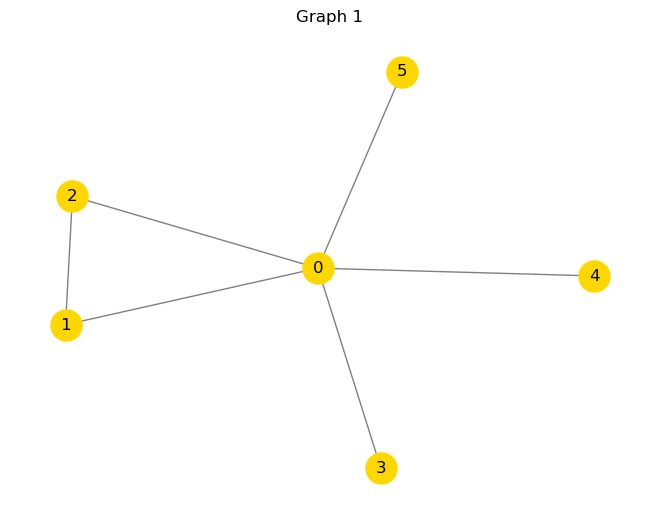

Graph 2: Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5)]


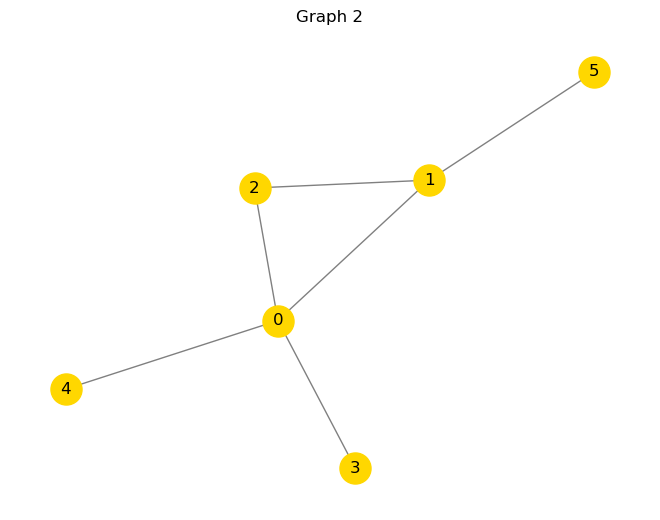

Graph 3: Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 5)]


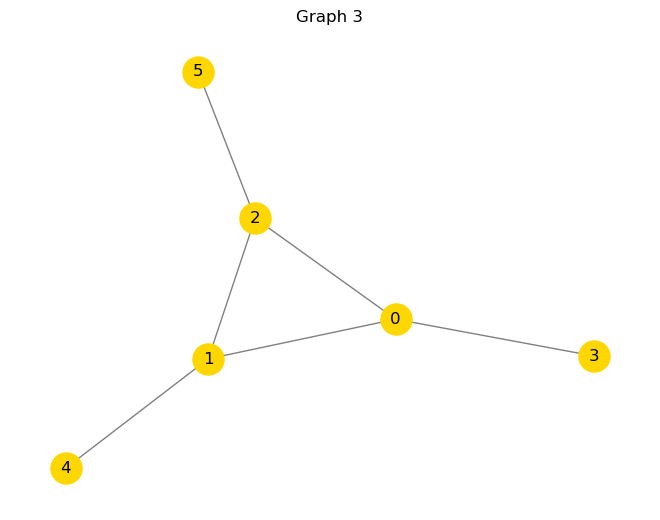

Graph 4: Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 5)]


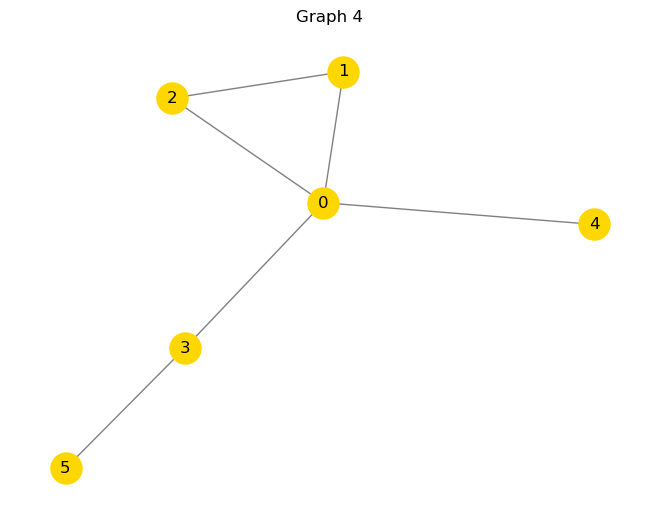

Graph 5: Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (3, 5)]


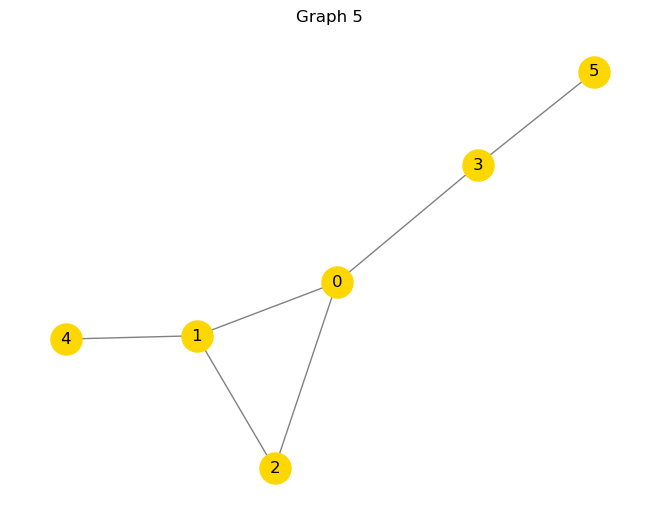

Graph 6: Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (3, 4), (3, 5)]


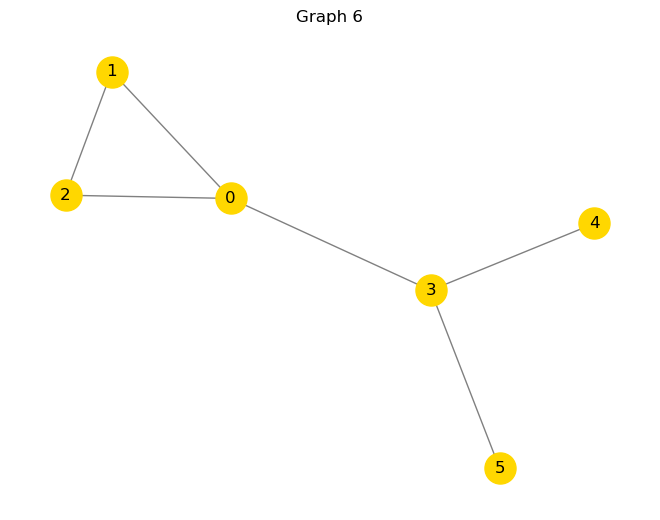

Graph 7: Edges: [(0, 1), (0, 2), (0, 4), (1, 2), (4, 3), (3, 5)]


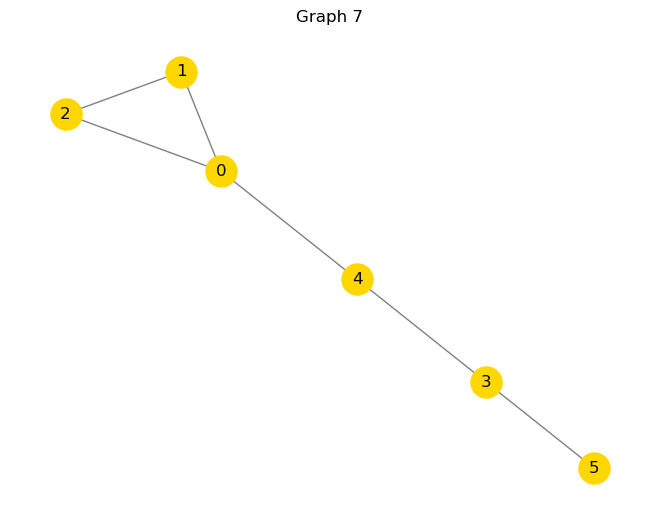

Graph 8: Edges: [(0, 1), (0, 3), (0, 4), (0, 5), (1, 2), (2, 3)]


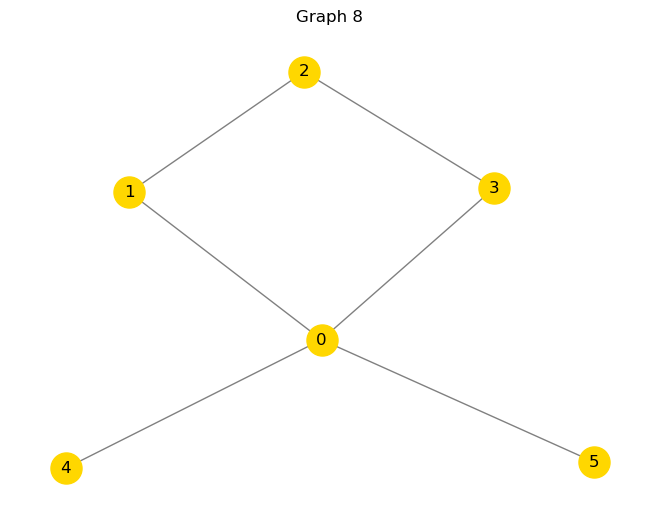

Graph 9: Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3)]


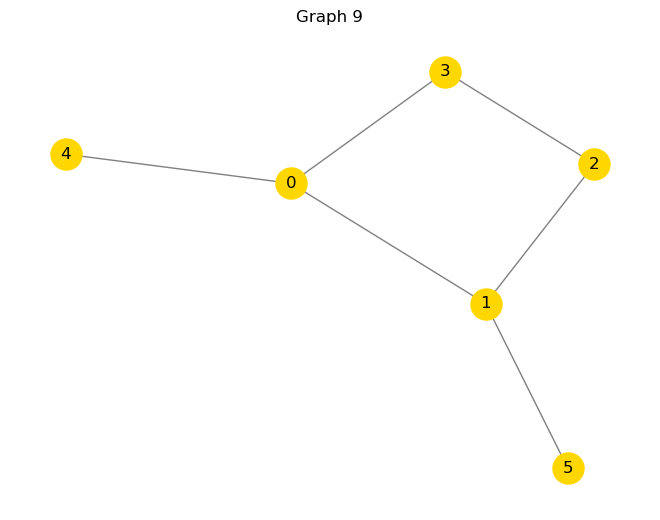

Graph 10: Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (2, 3), (2, 5)]


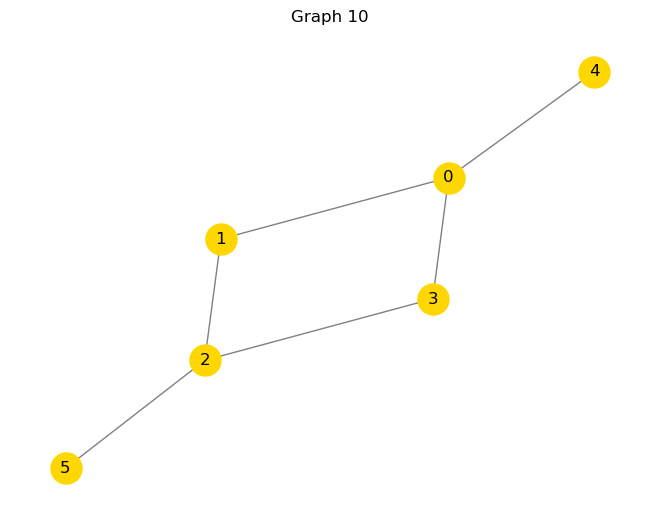

Graph 11: Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (2, 3), (4, 5)]


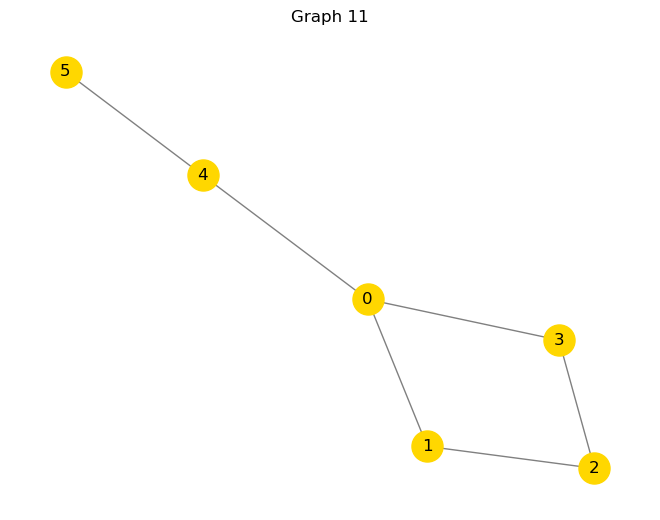

Graph 12: Edges: [(0, 1), (0, 4), (0, 5), (1, 2), (2, 3), (3, 4)]


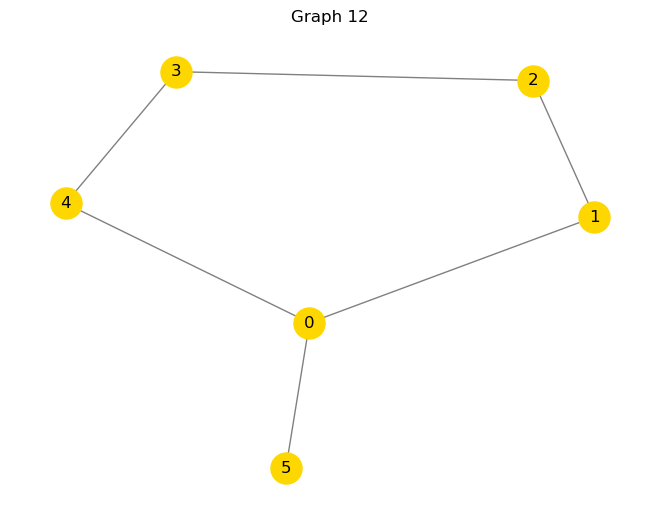

Graph 13: Edges: [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]


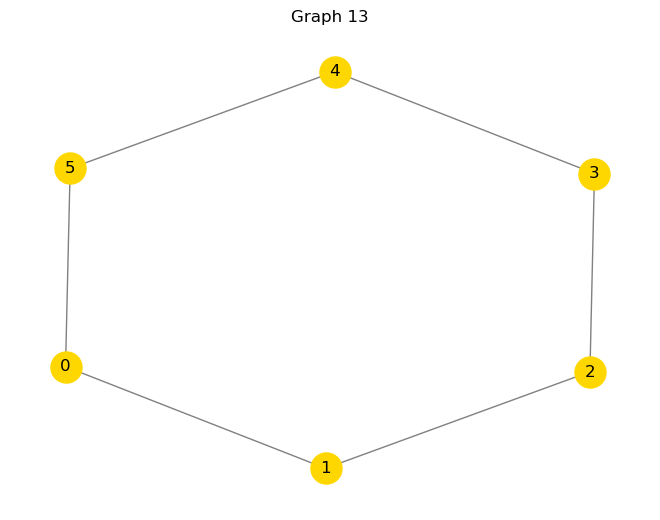

In [5]:
graphs_with_one_cycle = generate_graphs_with_one_cycle(6)

print(f"Total unique connected graphs with one cycle: {len(graphs_with_one_cycle)}")
for i, graph in enumerate(graphs_with_one_cycle):
    print(f"Graph {i + 1}: Edges:", list(graph.edges()))
    plt.figure()
    nx.draw(graph, with_labels = True, node_color = 'gold' , node_size = 500, edge_color = 'gray')
    plt.title(f"Graph {i + 1}")
    plt.show()

In [ ]:
# Poiščemo enociklične Laplacove integer grafe
def unicyclic_laplacian_integer_graph(n):
    graphs_with_one_cycle = generate_graphs_with_one_cycle(n)

    laplacian_graphs = []
    for i, graph in enumerate(graphs_with_one_cycle):
        if is_laplacian_integer_graph(graph):
            laplacian_graphs.append(graph)

    print(f"Total graphs with one cycle: {len(graphs_with_one_cycle)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")

    # Prikaz
    for i, graph in enumerate(laplacian_graphs):
        print(f"Laplacian Graph {i + 1}:")
        print("Edges:", graph.edges())
        plt.figure()
        pos = nx.spring_layout(graph) 
        nx.draw(graph, pos, with_labels = True, node_color = 'gold', node_size=750, edge_color = 'gray')
        plt.title(f"Laplacian Graph {i + 1}")
        plt.show() 

Total graphs with one cycle: 2
Total Laplacian integer graphs found: 2
Laplacian Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (1, 2)]


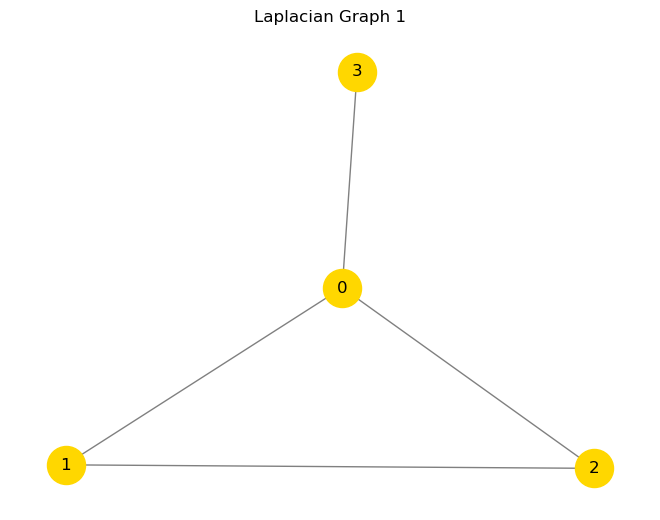

Laplacian Graph 2:
Edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


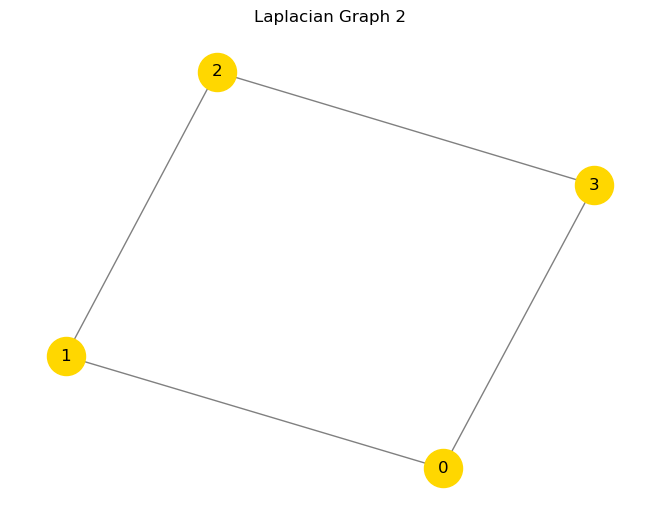

In [52]:
unicyclic_laplacian_integer_graph(4)

Total graphs with one cycle: 5
Total Laplacian integer graphs found: 1
Laplacian Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2)]


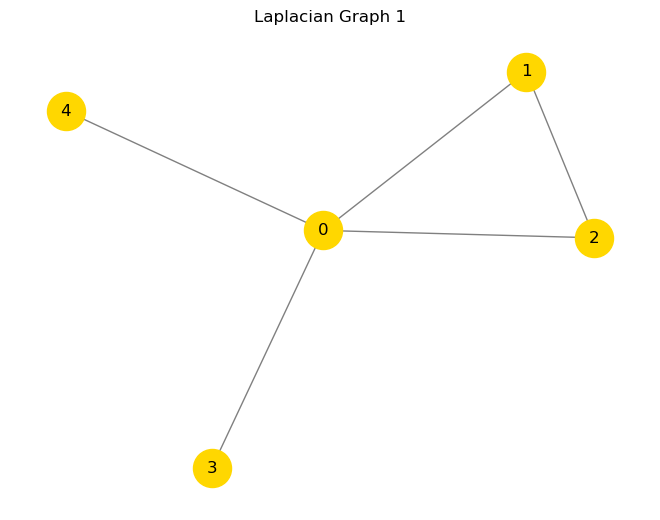

In [53]:
unicyclic_laplacian_integer_graph(5)

Total graphs with one cycle: 13
Total Laplacian integer graphs found: 2
Laplacian Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2)]


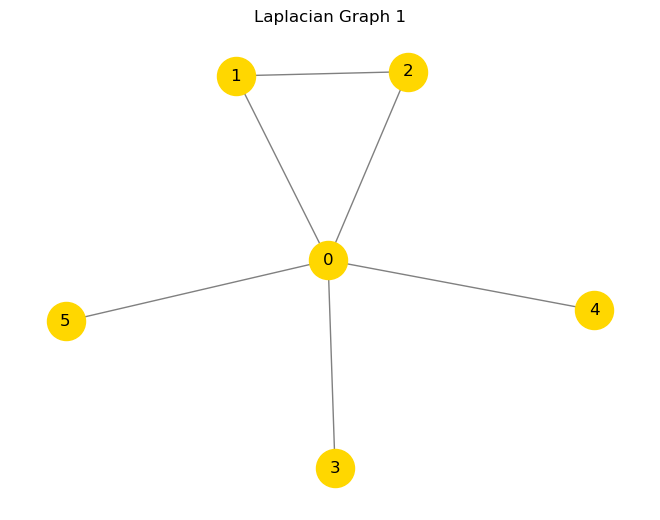

Laplacian Graph 2:
Edges: [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]


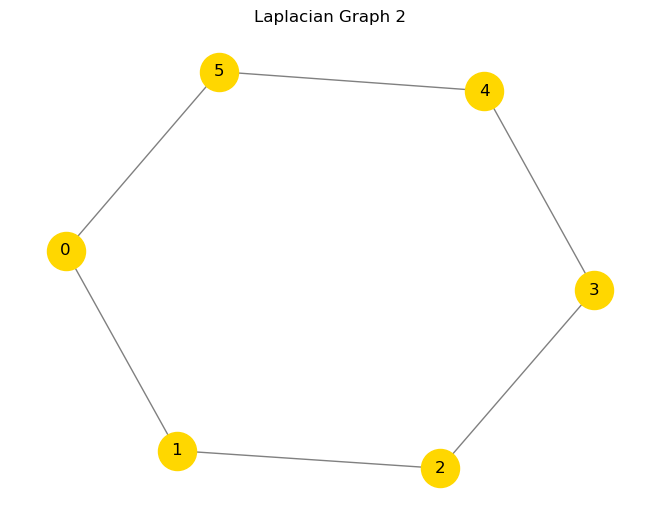

In [54]:
unicyclic_laplacian_integer_graph(6)

Total graphs with one cycle: 33
Total Laplacian integer graphs found: 1
Laplacian Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2)]


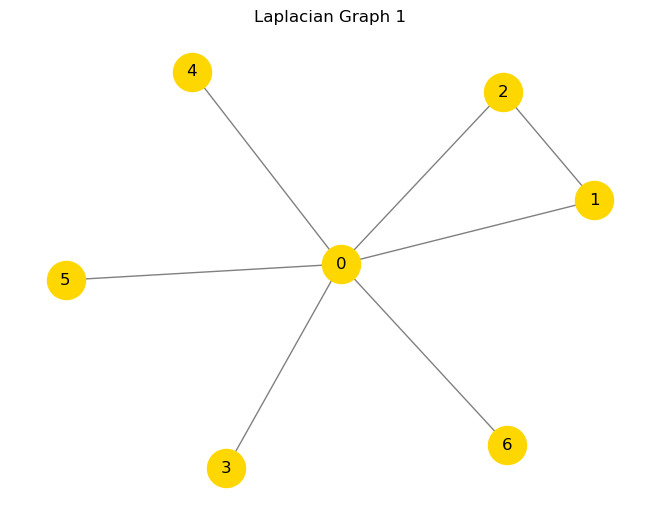

In [55]:
unicyclic_laplacian_integer_graph(7)

Total graphs with one cycle: 89
Total Laplacian integer graphs found: 1
Laplacian Graph 1:
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2)]


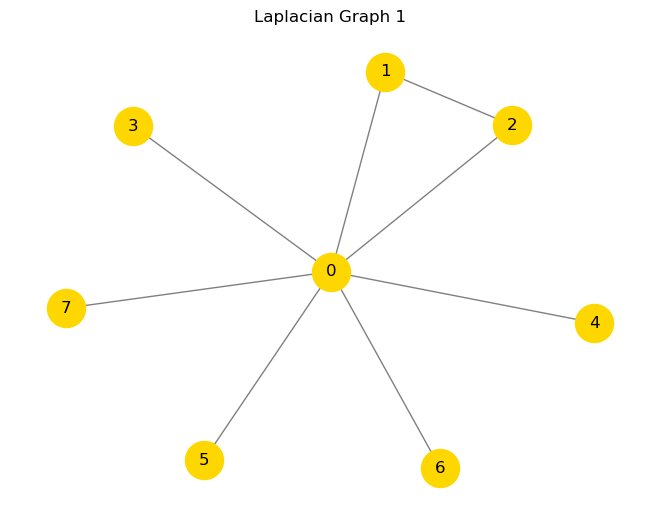

In [56]:
unicyclic_laplacian_integer_graph(8)